## 문제: Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델

Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.

```python
sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
```
* n_samples: 표본 데이터의 수
* n_features: 독립 변수의 수
* n_informative: 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
* n_redundant: 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
* n_repeated : 독립 변수 중 단순 중복된 성분의 수
* n_classes : 종속 변수의 클래스 수
* n_clusters_per_class : 클래스 당 클러스터의 수
* weights : 각 클래스에 할당된 표본 수
* random_state : 난수 발생 시드

단, n_informative + n_redundant + n_repeated <= n_features이어야 한다.

Sklearn으로 이진 베이지안 모델링을 해보자.
* (1) X, Y 데이터를 생성
* (2) X의 평균과 표준편차 계산해서 출력
* (3) 그래프 작성
    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.
* (4) 훈련데이터, 테스트데이터 3:1로 분리
* (5) 훈련데이터에 대하여 BernoulliNB 모델링
    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.
* (6) 테스트데이터에 대하여 예측값을 출력
    * 예측이 맞는지 실제값 Y와 비교해보자.
* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

### 데이터

2개의 속성을 적당한 상관관계를 가진 값으로 설정하여 100개의 데이터를 생성한다.

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [5]:
X[:5] #연속적이므로 bi~multi~에는 해당안됨. 정규분포

array([[ 1.56729159, -1.979027  ],
       [-2.01877705, -2.39579477],
       [-1.74985422, -0.67662352],
       [-0.19882069,  0.92471888],
       [-1.79181163, -0.88383514]])

In [14]:
Y[:5]

array([1, 0, 0, 0, 0])

### 평균, 표준편차

X는 numpy array이다. 평균과 표준편차를 출력해보자.

In [15]:
X.mean(), X.std()

(-0.06674112702230678, 1.373119226295888)

### 그래프

Y값에 따라 다른 색으로 그리기 위해서는 ```c=Y```라고 설정해준다.
```s```는 마커의 크기, 제곱으로 표현할 수 있다.

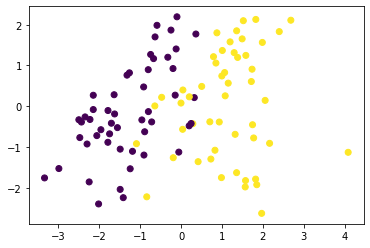

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

### 데이터 분할

데이터는 연속 값이다. 이 경우 ```binarize``` 설정을 해서, 임계치를 0.0을 사용해서 이분화한다.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### BernoulliNB

In [24]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

In [25]:
bnb.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### 예측

25개 가운데 3개 오류가 발생하였다. 정확성은 1 - 3/25 = 0.88이다.

In [26]:
list(zip(bnb.predict(X_test),Y_test, X_test)) #zip: 묶어줌 출력은x / list:출력해줌

[(0, 1, array([-0.00383787,  0.07814591])),
 (0, 0, array([-2.2495566, -1.8557206])),
 (1, 1, array([ 0.82741056, -1.07845276])),
 (0, 0, array([-2.50170693, -0.33088746])),
 (0, 0, array([-1.79181163, -0.88383514])),
 (1, 1, array([1.73437135, 0.90877145])),
 (0, 0, array([-1.74985422, -0.67662352])),
 (0, 0, array([-0.72093679, -0.38428559])),
 (1, 1, array([ 0.28602359, -0.42785808])),
 (1, 1, array([ 0.41517839, -1.35902557])),
 (1, 1, array([ 1.82118511, -1.78671244])),
 (1, 1, array([ 1.96931176, -2.62644307])),
 (1, 1, array([ 1.56729159, -1.979027  ])),
 (0, 0, array([-1.49069977, -1.05160844])),
 (0, 1, array([-1.09277659, -0.91758974])),
 (0, 0, array([-2.30114699, -0.92585493])),
 (1, 1, array([ 0.72732419, -1.29451873])),
 (0, 0, array([-1.19004082, -1.10485826])),
 (0, 0, array([-1.32413001,  0.76252019])),
 (0, 1, array([-0.64311172,  0.00805734])),
 (1, 1, array([1.82606069, 2.12903055])),
 (0, 0, array([-1.78920877, -0.10492214])),
 (0, 0, array([-2.47829017, -0.7685408

이진 값을 넣어서 예측값을 출력해보자.

In [27]:
bnb.predict([[1,1], [1,-1], [-1,1], [-1,-1], [0,0]])

array([1, 1, 0, 0, 0])

### 정확성

In [32]:
bnb.score(X_test, Y_test) #xtest(2차원배열)넣으면 자동으로 그 예측값과 ytest를 비교하는듯?

0.88